#Monte Carlo algorithm in Reinforcement Learning AI 

In this paper, we experiment Reinforcement learning for an AI model to play the Chutes and Ladders Game using Monte Carlo algorithm. We record the performace of the model playing the game for 1000 times, graph the learning process, and calculate the variation of its performance. After that we will compare the performance of Monte Carlo model with other algorithms to pick the best algorithm for Chutes and Ladders. <p>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def nextState(state, roll):
    '''
    This function transitions from the current state and current dice roll to the next state.
    INPUTS:
        state is the current state you are in (0 to 100)
        roll is the number showing on the dice (1 to 6)
    RETURN VALUE:
    this function returns the next state integer
    '''
    # we create a dictionary for the ladders and chutes.  The key is the start state of the chute/ladder
    # and the value is the ending state.  
    ladders = {1:38,4:14,9:31,21:42,28:84,36:44,51:67,71:91,80:100}
    chutes = {16:6,48:26,49:11,56:53,62:19,64:60,87:24,93:73,95:75,98:78}
    
    next_state = state + roll
    if next_state > 100:
        next_state = 100
    # now check for ladders
    if next_state in ladders:
        next_state = ladders[next_state]
    # now check for chutes
    if next_state in chutes:
        next_state = chutes[next_state]        
    return next_state
    
def roll(dice_color):
    '''
    This function randomly rolls one of the four effron dice.  
    INPUT:
    dice_color should be among "red","blue","black", or "green"
    OUTPUT:
    an integer randomly selected from one of the dice
    '''
    
    if dice_color == 0:                         # red dice 
        return random.choice([2,2,2,2,6,6])
    if dice_color == 1:                         # blue dice 
        return 3
    if dice_color == 2:                         # black dice 
        return random.choice([0,0,4,4,4,4])
    if dice_color == 3:                         # green dice 
        return random.choice([1,1,1,5,5,5])
    # for invalid input
    return None

In [ ]:
def e_greedy(s, policy, epsilon):
    '''
    Implements an e-greedy policy.
    With probability epsilon, it returns random action choice
    otherwise returns action choice specified by the policy

    s = current state
    policy = policy function (an array that is indexed by state)
    epsilon (0 to 1) a probability of picking exploratory random action
    '''
    r = np.random.random()
    if r > epsilon:
        return policy[s]
    else:
        return random.randint(0,3)

#-------------------------------------------------------------
#keep total_reward
def make_trajectory(policy,epsilon):
  '''
  Simulate one trajectory of experience
  Return list of tuples during trajectory
  Each tuple is (s,a,r) -> state / action / reward
  epsilon = probability of exploratory action
  '''
  traj = []
  s=0   #  turn 0, pot 0
  total_reward = 0

  while (s < 100):
    a = e_greedy(s,policy,epsilon)
    s_prev = s
    action_dice = roll(a)
    s = nextState(s,action_dice)
    total_reward+=1
    traj.append((s_prev,a,1))
  # final reward = state value, final action = 0 (meaningless)
  traj.append((s,0,1))
  return traj,total_reward


In [ ]:
P = np.random.choice(4, 101)
epsilon = 0.1
k = 10
print(P)
for i in range(k):
  t,r = make_trajectory(P,epsilon)
  if k <= 10:
    print(t,r)

[1 0 2 3 0 2 2 0 3 3 2 1 3 0 2 1 1 2 1 0 1 1 0 1 3 1 1 2 3 3 1 0 2 1 3 3 1
 1 1 0 1 2 3 0 1 1 0 0 0 2 2 2 0 0 3 2 1 2 0 2 1 2 0 2 3 0 3 3 3 3 2 0 3 3
 1 0 3 2 1 3 0 1 2 3 2 2 0 1 2 1 3 3 2 1 1 2 2 2 2 2 0]
[(0, 1, 1), (3, 3, 1), (14, 2, 1), (14, 2, 1), (14, 2, 1), (18, 1, 1), (42, 3, 1), (43, 0, 1), (45, 1, 1), (26, 1, 1), (29, 3, 1), (34, 3, 1), (39, 0, 1), (45, 1, 1), (26, 1, 1), (29, 3, 1), (34, 3, 1), (35, 3, 1), (44, 1, 1), (47, 0, 1), (11, 1, 1), (14, 2, 1), (14, 2, 1), (18, 1, 1), (42, 3, 1), (43, 0, 1), (45, 1, 1), (26, 1, 1), (29, 3, 1), (30, 1, 1), (33, 1, 1), (44, 1, 1), (47, 0, 1), (53, 0, 1), (55, 2, 1), (59, 2, 1), (63, 1, 1), (66, 3, 1), (67, 3, 1), (72, 3, 1), (77, 2, 1), (81, 1, 1), (84, 2, 1), (88, 2, 1), (92, 0, 1), (94, 1, 1), (97, 2, 1), (97, 2, 1), (100, 0, 1)] 48
[(0, 1, 1), (3, 3, 1), (8, 3, 1), (31, 0, 1), (33, 1, 1), (44, 1, 1), (47, 0, 1), (53, 3, 1), (58, 0, 1), (60, 1, 1), (63, 2, 1), (67, 3, 1), (72, 3, 1), (77, 2, 1), (81, 1, 1), (84, 2, 1), (84, 0, 1), (

Learning

In [ ]:
def init ():
  '''
  Create totals, counts and policy defaults
  '''
  totals = np.zeros((101,4))
  counts = np.zeros((101,4)).astype(int)
  P = np.zeros(101).astype(int)
  return totals,counts,P

def compute_Q(totals,counts):
  '''
  Compute the Q values based on totals and counts (average)
  '''
  Q = np.zeros((101,4))
  for i in range(len(totals)):
    for a in range(4):
      if counts[i][a] > 0:
        Q[i][a] = totals[i][a] / counts[i][a]
      else:
        Q[i][a] = 0
  return Q

def policy_improvement(Q):
  #min element of each row in Q
  V = np.min(Q,axis=1)
  P = np.argmin(Q,axis=1)
  return V,P

#-------------------------------------------------------------
def policy_evaluation(totals,counts,policy,n,epsilon):
  '''
  do n trajectories of learning
  and update the v/count arrays
  '''
  opt_reward = 100000
  #n = 100
  for i in range(n):
    t,r = make_trajectory(policy,epsilon)
    m = len(t)
    sum_r = np.zeros(m)
    sum_r[m-1] = t[-1][2]
    opt_reward = min(opt_reward,r)
    for j in range(m-2,-1,-1):
      sum_r[j] = sum_r[j+1] + t[j][2]

    for j in range(m):
      s,a,r = t[j]
      counts[s,a] += 1
      totals[s,a] += sum_r[j]
    return opt_reward

#avg steps from n times make_trajectory to test how the model learning so far
def assess_policy(P, n):
  total_r = 0
  for i in range(n):
    traj, r = make_trajectory(P, 0)
    total_r += r
  return total_r/n

def policy_iteration(totals,counts,P,Q,n,m,epsilon):
  '''
  Perform n iterations of policy iteration 
  using m trials (episodes) per policy update
  '''
  train_count = []
  epoch_r = []
  opt = 100000
  #number of time to test a current policy
  trail = 100
  for i in range(n):
    Q = compute_Q(totals,counts)
    V,P = policy_improvement(Q)
    r = policy_evaluation(totals,counts,P,m,epsilon)
    opt = min(r,opt)
    if i%10 == 0:
      epoch_r.append(assess_policy(P,100))
      train_count.append(i//10)

  Q = compute_Q(totals,counts)
  V,P = policy_improvement(Q)
  return opt,epoch_r,train_count

#-------------------------------------------------------------
def assess (policy,trials):
  '''
  Assess the value of the current policy by completing #trials
  using the specified policy (no e-greedy random actions)
  Does not accrue learning experience nor change policy
  '''
  totals,counts,P = init()
  policy_evaluation(totals,counts,policy,trials,0)
  Q = compute_Q(totals,counts)
  print(Q)
  V,P = policy_improvement(Q)
  return V

MIN STEPS:  9


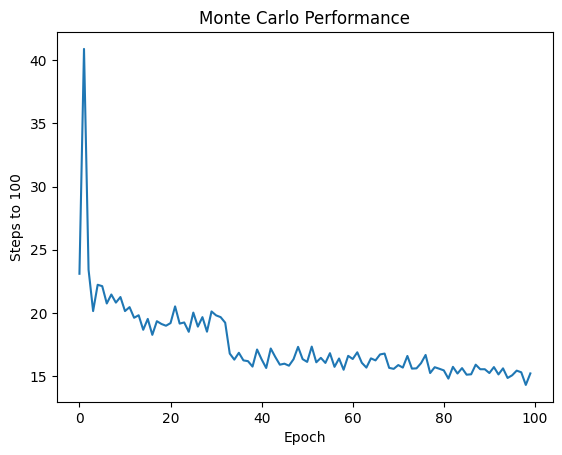

In [ ]:
totals,counts,P = init()
m = 100
n = 1000
epsilon = 0.1
Q = compute_Q(totals,counts)
V,P = policy_improvement(Q)
reward,avg_epoch,train_count = policy_iteration(totals,counts,P,Q,n,m,epsilon)

Q = compute_Q(totals,counts)
V,P = policy_improvement(Q)
# print('Q =\n',Q)
# print('V =\n',V)
# print('P =\n',P)
print('MIN STEPS: ',reward)

plt.plot(train_count,avg_epoch)
plt.title('Monte Carlo Performance')
plt.xlabel('Epoch')
plt.ylabel('Steps to 100')
plt.show()

In [ ]:
print(make_trajectory(P,0))

([(0, 0, 1), (2, 0, 1), (8, 2, 1), (12, 3, 1), (17, 3, 1), (18, 2, 1), (22, 1, 1), (25, 1, 1), (84, 0, 1), (86, 2, 1), (90, 2, 1), (90, 2, 1), (94, 1, 1), (97, 1, 1), (100, 0, 1)], 14)


In [ ]:
#Final number of steps variation 
print(avg_epoch[2::])
print(np.std(avg_epoch[2::]))

[23.42, 20.15, 22.23, 22.12, 20.75, 21.46, 20.82, 21.26, 20.15, 20.46, 19.62, 19.82, 18.67, 19.53, 18.27, 19.35, 19.13, 18.99, 19.2, 20.52, 19.16, 19.25, 18.51, 20.03, 18.92, 19.67, 18.52, 20.12, 19.81, 19.67, 19.23, 16.79, 16.31, 16.85, 16.25, 16.19, 15.76, 17.11, 16.33, 15.65, 17.19, 16.52, 15.91, 15.99, 15.83, 16.34, 17.32, 16.35, 16.13, 17.34, 16.1, 16.45, 16.05, 16.82, 15.74, 16.4, 15.51, 16.61, 16.36, 16.89, 16.06, 15.68, 16.41, 16.25, 16.72, 16.79, 15.66, 15.58, 15.88, 15.68, 16.6, 15.6, 15.62, 16.03, 16.68, 15.25, 15.71, 15.59, 15.46, 14.81, 15.74, 15.21, 15.64, 15.12, 15.15, 15.91, 15.55, 15.55, 15.25, 15.72, 15.14, 15.62, 14.86, 15.07, 15.44, 15.31, 14.31, 15.22]
2.045142702470756


###Calculate avg steps of final policy P from training.

In [ ]:
sum = 0
for i in range(1000):
  sum += make_trajectory(P,0)[1]
print(sum/1000)

11.367
